In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

df = pd.read_csv('diamonds.csv')


Saving diamonds.csv to diamonds.csv


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропусков в данных нет, оставляем все столбцы. Типы данных: float, string, int

p.s. Очень смущает столбец Unamed: 0

<ipython-input-3-8820376523cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


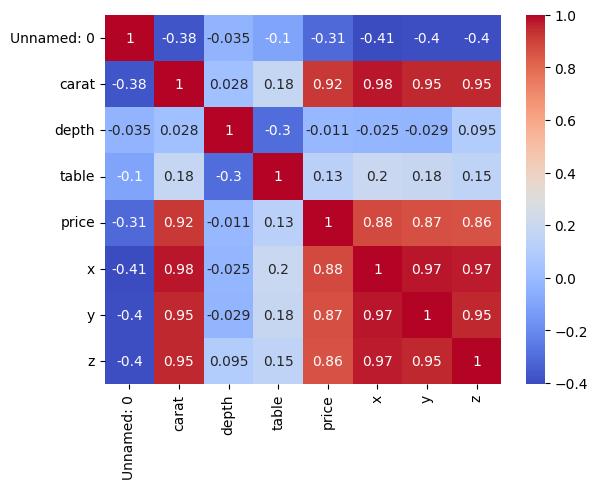

In [ ]:
plt.figure()
cm = df.corr()
sns.heatmap(cm, annot=True, cmap= 'coolwarm')
plt.show()

Высокая корреляция у:

carat и параметрами x, y, z

параметрами x, y, z между собой

price с параметрами carat, x, y, z


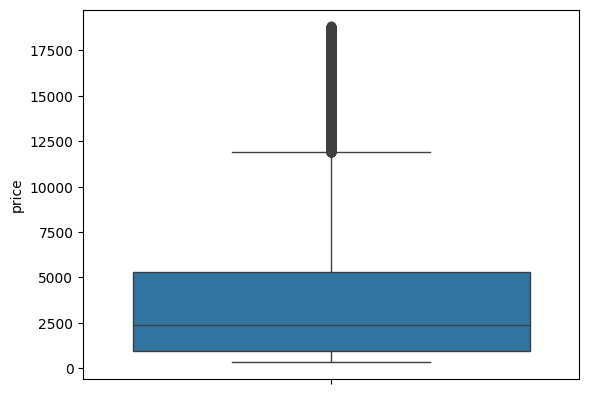

In [ ]:
plt.figure()
sns.boxplot(data=df["price"])
plt.show()



Выбросы плотненько лежат выше 12500


А теперь делим df на части train и test как 80% и 20%

(потому что я так хочу)

In [ ]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
def cut(val):
  if val == "Fair":
    return 1
  if val == "Good":
    return 2
  if val == "Very Good":
    return 3
  if val == "Premium":
    return 4
  if val == "Ideal":
    return 4
  return 0

df['cut'] = df['cut'].apply(cut)

тут я поменял текстовые параметры на числовые, могу сделать это и для других, но это долго, а я уже показал, что могу

поэтому другие я подчищу

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

#df = df.drop(columns = ['color', 'clarity'])

tr = df.head(43152)
test = df.tail(10788)

model = LinearRegression()
y_train = tr['price'].values
x_train = tr.drop(columns = ['price'])
model.fit(x_train, y_train)

x_test = test.drop(columns = ['price'])
y_test = test['price'].values

print(model.coef_)
print(model.intercept_)

y_pred = model.predict(x_test)

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,0 y_pred))
print('R2: ', r2_score(y_train, y_pred))



[ 2.97951990e-02  8.90718039e+03  1.77921800e+02  3.47285456e+01
  5.22567207e+01 -4.11127638e+01 -3.07738988e+01 -7.78052061e+01
  9.99413465e+01  4.52663665e+01]
-4002.3431559345527
Mean Absolute Error:  1224.2292209680545
Mean Squared Error:  1814326.9822171757
R2:  -4.324545636260656


нормально...

придется восстанавливать столбцы

In [ ]:
def clarity(value):
  if value == 'I1':
    return 10
  elif value == 'SI2':
    return 20
  elif value == 'SI1':
    return 30
  elif value == 'VS2':
    return 40
  elif value == 'VS1':
    return 50
  elif value == 'VVS2':
    return 60
  elif value == 'VVS1':
    return 70
  elif value == 'IF':
    return 80

df['clarity'] = df['clarity'].apply(clarity)

color diamond colour, from J (worst) to D (best)

ну клево конечно но как мне распределить

In [ ]:
def color(value):
  if value == 'J':
    return 10
  elif value == 'I':
    return 20
  elif value == 'H':
    return 30
  elif value == 'G':
    return 40
  elif value == 'F':
    return 50
  elif value == 'E':
    return 60
  elif value == 'D':
    return 70

df['color'] = df['color'].apply(color)

Не помогло...


In [ ]:
features = x_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

print(coeff_df.sort_values(by='Coefficient'))

   Coefficient    features
7   -77.805206           x
5   -41.112764       depth
6   -30.773899       table
0     0.029795  Unnamed: 0
3    34.728546       color
9    45.266366           z
4    52.256721     clarity
8    99.941346           y
2   177.921800         cut
1  8907.180388       carat


In [ ]:
#model = LinearRegression()
#y_test = test['price'].values
#x_test = test.drop(columns = ['price'])
#model.fit(x_test, y_test)



y_pred = model.predict(x_test)

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

Mean Absolute Error:  1224.2292209680545
Mean Squared Error:  1814326.9822171757
R2:  -4.324545636260656


Чтож, показатели MAE и MSE слишком высокие, хоть и снизились по сравнению с тестовой частью. Возможно проблема в df, а может во мне.


In [ ]:
y_test = test['price'].values
x_test = test.drop(columns = ['price'])

x_train, x_test, y_train, y_test = train_test_split(x_test, y_test, test_size=0.3)

model = LinearRegression()
model.fit(x_train, y_train)

print(model.coef_)
print(model.intercept_)

y_pred = model.predict(x_test)

y_pred = model.predict(x_test)

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

[4.75394371e-02 7.76328356e+02 4.41562019e+01 8.55802444e+00
 1.21376210e+01 2.29350656e+01 1.74252006e-01 3.50869130e+02
 4.71928892e+02 1.39002963e+02]
-8208.611274176934
Mean Absolute Error:  120.93340727944862
Mean Squared Error:  87100.87378233395
R2:  0.7414849066202112
